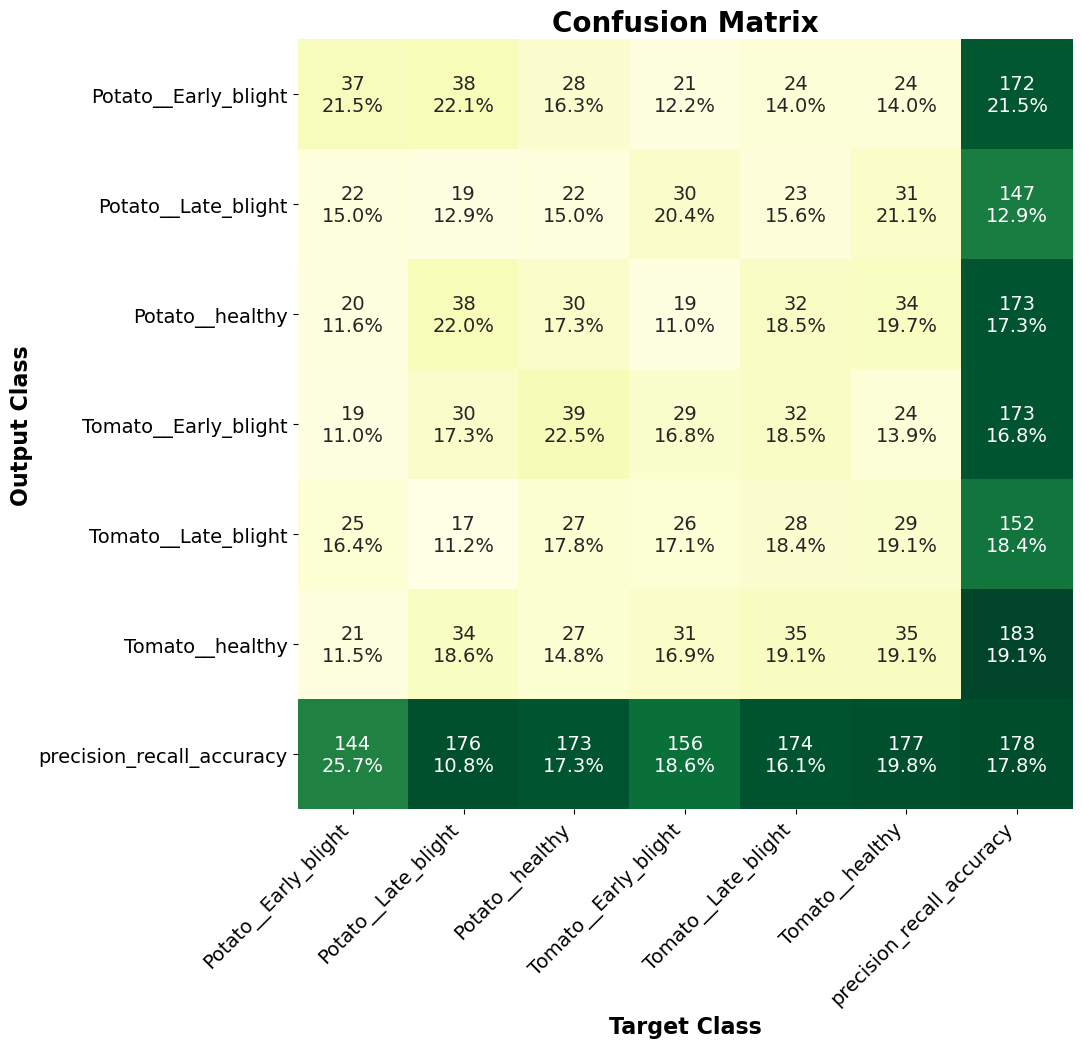

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.metrics import confusion_matrix

np.random.seed(46) # for consistent result

def c_m_visualize(c_m, labels, is_num_class=False, extra_r_c_label='precision_recall_accuracy', row_title='Target Class', col_title='Output Class', fig_title='Confusion Matrix', color_bar=False, color_map='YlGn', figsize=(10, 10)):
    """
    c_m: confusion matrix
    labels: list of labels
    is_num_class: It indicates that whether a heatmap generates depends on numbers of classes or percentages
    extra_r_c_label: extra column and row label for precision, recall, support and accuracy as a str
    row_title: horizontal title of the figure
    col_title: verticle title of the figure
    fig_title: title of the figure
    color_bar: False means there will be no color bar attached to the figure and vice versa
    color_map: supported color map for sns.heatmap
    figsize: size of the figure

    Examle:
    labels = ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy', 'Tomato__Early_blight', 'Tomato__Late_blight', 'Tomato__healthy']
    c_m_visualize(confusion_matrix(y_true, y_pred, labels=list(range(0, len(labels)))), labels)
    c_m_visualize(confusion_matrix(y_true, y_pred, labels=list(range(0, len(labels)))), labels, is_num_class=True)
    """
    params = {
        'figure.figsize': figsize,
        'axes.titleweight': 'bold',
        'axes.labelsize': '16',
        'axes.titlesize':'20',
        'axes.labelweight':'bold',
        'xtick.labelsize':'14',
        'ytick.labelsize':'14',
        'font.size': '14'
    }
    pylab.rcParams.update(params)

    c_m_sum = np.sum(c_m, axis=1, keepdims=True)
    prediction_rate = c_m / c_m_sum.astype(float) * 100
    row_wise_sum = c_m.sum(axis=0)
    col_wise_sum = c_m.sum(axis=1)
    total_true_pos = c_m.diagonal()

    accuracy = total_true_pos.sum() / len(y_true) * 100
    precision = total_true_pos / col_wise_sum * 100
    recall = total_true_pos / row_wise_sum * 100

    annotation = np.empty_like(c_m).astype(str)
    rows, cols = c_m.shape

    for i in range(rows):
        for j in range(cols):
            count = c_m[i, j]
            pre = prediction_rate[i, j]
            annotation[i, j] = '%d\n%.1f%%' % (count, pre)

    col_wise_sum = np.append(col_wise_sum, total_true_pos.sum())
    precision = np.append(precision, accuracy)

    recall = np.array([[i, j] for i,j in zip(row_wise_sum, recall)])
    precision = np.array([[i, j] for i,j in zip(col_wise_sum, precision)])

    annotation = np.concatenate((annotation, [list(map(lambda data: '%d\n%.1f%%' % (data[0], data[1]), recall))]), axis=0)
    annotation = np.concatenate((annotation, np.array([list(map(lambda data: '%d\n%.1f%%' % (data[0], data[1]), precision))]).T), axis=1)
    labels.append(extra_r_c_label)

    c_m = np.concatenate((c_m, [recall[:, 0]]), axis=0) if is_num_class else np.concatenate((c_m, [recall[:, 1]]), axis=0)
    c_m = np.concatenate((c_m, np.array([precision[:, 0]]).T), axis=1) if is_num_class else np.concatenate((c_m, np.array([precision[:, 1]]).T), axis=1)

    c_m = pd.DataFrame(c_m, index=labels, columns=labels)
    c_m.index.name = col_title
    c_m.columns.name = row_title

    heatmap = sns.heatmap(c_m, annot=annotation, fmt='', cbar=color_bar, cmap=color_map)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(fig_title)
    plt.show()

# generate random true data for 6 classes
y_true = np.random.randint(0, 6, 1000) 
# generate random predicted data for 6 classes
y_pred = np.random.randint(0, 6, 1000) 

# labeling the classes as follows
labels = [
  'Potato__Early_blight', 
  'Potato__Late_blight', 
  'Potato__healthy', 
  'Tomato__Early_blight', 
  'Tomato__Late_blight', 
  'Tomato__healthy'
]

# c_m_visualize(confusion_matrix(y_true, y_pred, labels=list(range(0, len(labels)))), labels)
c_m_visualize(confusion_matrix(y_true, y_pred, labels=list(range(0, len(labels)))), labels, is_num_class=True)